In [1]:
#final verison of infodef

In [2]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
import operator as op
import seaborn as sns
from tqdm import tqdm_notebook as load
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [3]:
class Cell:
    def __init__(self):
        self.Ra = random.gauss(1,0.01)
        self.Rb = random.gauss(1,0.01)
        self.Rc = random.gauss(1,0.01)
        self.Rd = random.gauss(1,0.01)
    def cellTimeCounter(self, byte):
        if byte == 1:
            return self.Ra,self.Rd
        if byte == 0:
            return self.Rb,self.Rc

In [4]:
class PUF:
    def __init__(self, cells_num):
        self.n_cells = cells_num
        self.puf = [Cell() for i in range(self.n_cells)]
    def calc(self, inp):
        time_top = 0
        time_bottom = 0
        for i in range(self.n_cells):
            time_top += self.puf[i].cellTimeCounter(inp[i])[0]
            time_bottom += self.puf[i].cellTimeCounter(inp[i])[1]
        delta = time_top - time_bottom
        if abs(delta) < 0.01:
            delta += random.gauss(0, 0.02)
        if delta > 0:
            return 1, delta
        else:
            return 0, delta

In [5]:
turbopufs = []
size = 16
cells_number = 64
for i in range(size):
    turbopufs.append(PUF(cells_number))

In [6]:
#Generate выбор очка

In [7]:
data = []
size = 100000

for i in load(range(size)):
    C = [random.randint(0,1) for x in range(cells_number)]
    data.append(C)

In [8]:
def get_sample(n_xors):
    labels = []
    for i in range(size): 
        out = turbopufs[0].calc(data[i])[0]
        for j in range(0, n_xors):
            out = op.xor(out, turbopufs[j+1].calc(data[i])[0])
                
        labels.append(out)
    
    X_ = np.asarray(data).reshape(size, cells_number)
    y_ = np.asarray(labels)   
    return X_, y_

In [9]:
def get_logreg_acc(n_xors):

    X, y = get_sample(n_xors) 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    
    logreg = LogisticRegression(solver='lbfgs', max_iter=5000)
    logreg.fit(X_train,y_train)
    y_pred=logreg.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    return metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.99832
Accuracy: 0.94436
Accuracy: 0.8256
Accuracy: 0.62796
Accuracy: 0.57456
Accuracy: 0.52608
Accuracy: 0.511
Accuracy: 0.504
Accuracy: 0.5084
Accuracy: 0.50168



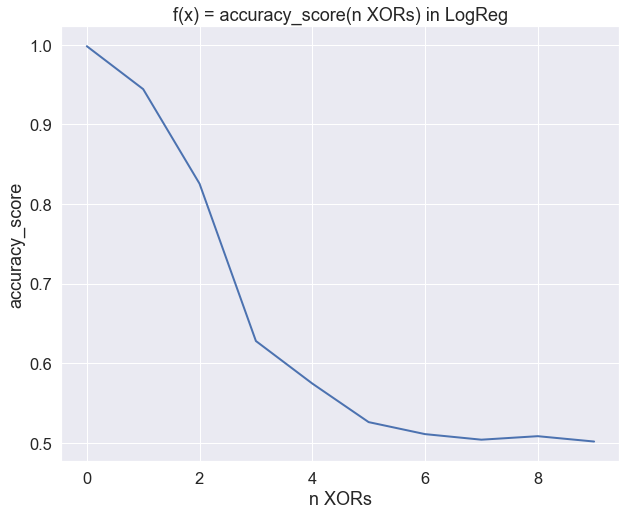

In [10]:
import matplotlib.pyplot as plt

n_x = 10

x1 = []
y1 = []

for i in load(range(0, n_x)):
    x1.append(i)
    y1.append(get_logreg_acc(i))
    
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
plt.plot(x1, y1, lw=2)
plt.xlabel('n XORs')
plt.ylabel('accuracy_score')
plt.title('f(x) = accuracy_score(n XORs) in LogReg')
plt.show()

In [21]:
#Нейрон очка

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [7]:
#def create_baseline():
    #model = Sequential()
    #model.add(Dense(256, input_dim=64, activation='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(128, input_dim=256, activation='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(64, input_dim=128, activation='relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(16, input_dim=64, activation='relu'))
    #model.add(Dense(1, activation='sigmoid'))
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #return model

def create_baseline():
    model = Sequential()
    model.add(Dense(units=128, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
    model.add(Dense(units=256, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
    model.add(Dropout(0.3))
    model.add(Dense(units=512, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
    model.add(Dropout(0.3))
    #model.add(Dense(units=1024, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
    #model.add(Dropout(0.3))
    #model.add(Dense(units=512, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
    #model.add(Dropout(0.3))
    model.add(Dense(units=256, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
    model.add(Dropout(0.3))
    model.add(Dense(units=128, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
    model.add(Dropout(0.3))
    model.add(Dense(units=64, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
    model.add(Dense(units=32, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
    model.add(Dense(units=16, activation='relu', kernel_initializer=keras.initializers.he_uniform()))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [24]:
data = []
size = 20000
cells_number = 64
for i in load(range(size)):
    C = [random.randint(0,1) for x in range(cells_number)]
    data.append(C)

In [25]:
def get_sample(n_xors):
    labels = []
    for i in range(size): 
        out = turbopufs[0].calc(data[i])[0]
        for j in range(0, n_xors):
            out = op.xor(out, turbopufs[j+1].calc(data[i])[0])
                
        labels.append(out)
    
    X_ = np.asarray(data).reshape(size, cells_number)
    y_ = np.asarray(labels)   
    return X_, y_

In [26]:
def get_NN_acc(n_xors):

    X, y = get_sample(n_xors) 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    
    epoches = []
    train_accs = []
    test_accs = []
    losses = []
    model = create_baseline()

    for epoch in load(range(15)):
        epoches.append(epoch)
        history = model.fit(X_train, y_train, batch_size=64, epochs = 1, validation_split = 0, verbose = 0)
        train_accs.append(history.history['accuracy'])
        losses.append(history.history['loss'])
        ev = model.evaluate(X_test,y_test, verbose = 1)
        test_accs.append(ev[1])
        print("Acc =", ev[1])
        if(ev[1] <= 0.95*max(test_accs)):
            return ev[1]
    
    #model = create_baseline()
    #model.fit(X_train, y_train, epochs = 7, validation_split = 4, verbose = 0)
    #ev = model.evaluate(X_test,y_test, verbose = 1)
    print("Accuracy:", ev[1])
    return ev[1]

In [27]:
import matplotlib.pyplot as plt

n_x = 7

x1 = []
y1 = []

for i in load(range(0, n_x)):
    x1.append(i)
    y1.append(get_NN_acc(i))
    

5000/5000 [==============================] - ETA: 12 - ETA: 0 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 103us/step
Acc = 0.9624000191688538
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 63us/step
Acc = 0.9747999906539917
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 73us/step
Acc = 0.9775999784469604
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 61us/step
Acc = 0.9789999723434448
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 64us/step
Acc = 0.9761999845504761
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 68us/step
Acc = 0.9793999791145325
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 96us/step
Acc = 0.9768000245094299

5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 68us/step
Acc = 0.8579999804496765
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 67us/step
Acc = 0.879800021648407
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 62us/step
Acc = 0.9074000120162964
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 63us/step
Acc = 0.9200000166893005
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 59us/step
Acc = 0.9387999773025513
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 56us/step
Acc = 0.9441999793052673
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 58us/step
Acc = 0.9377999901771545
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  -

5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 71us/step
Acc = 0.48019999265670776
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 60us/step
Acc = 0.5198000073432922
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 57us/step
Acc = 0.5198000073432922
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 59us/step
Acc = 0.5212000012397766
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 61us/step
Acc = 0.5979999899864197
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 61us/step
Acc = 0.656000018119812
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 62us/step
Acc = 0.7376000285148621
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 61u

5000/5000 [==============================] - ETA: 10 - ETA: 0 - ETA:  - ETA:  - ETA:  - 0s 72us/step
Acc = 0.5206000208854675
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 66us/step
Acc = 0.5199999809265137
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 59us/step
Acc = 0.5192000269889832
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 66us/step
Acc = 0.5414000153541565
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 61us/step
Acc = 0.6528000235557556
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 60us/step
Acc = 0.6751999855041504
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 61us/step
Acc = 0.7250000238418579
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 59us/ste

5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 69us/step
Acc = 0.5149999856948853
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 56us/step
Acc = 0.5149999856948853
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 64us/step
Acc = 0.5149999856948853
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 59us/step
Acc = 0.5149999856948853
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 55us/step
Acc = 0.5149999856948853
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 59us/step
Acc = 0.5149999856948853
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 57us/step
Acc = 0.5149999856948853
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 62us/step
Acc = 0.5149999856948853


5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 71us/step
Acc = 0.4851999878883362
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 102us/step
Acc = 0.5189999938011169
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 98us/step
Acc = 0.5121999979019165
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 57us/step
Acc = 0.5134000182151794
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 67us/step
Acc = 0.5202000141143799
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 63us/step
Acc = 0.5188000202178955
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 64us/step
Acc = 0.5062000155448914
5000/5000 [=======================

5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 76us/step
Acc = 0.4943999946117401
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 63us/step
Acc = 0.5027999877929688
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 69us/step
Acc = 0.5023999810218811
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 62us/step
Acc = 0.5037999749183655
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 57us/step
Acc = 0.5023999810218811
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 62us/step
Acc = 0.4968000054359436
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 69us/step
Acc = 0.4975999891757965
5000/5000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  

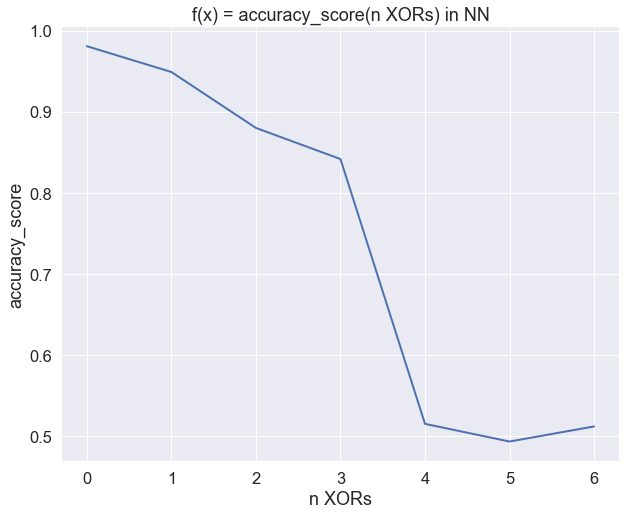

[0.9807999730110168, 0.9490000009536743, 0.8799999952316284, 0.8416000008583069, 0.5149999856948853, 0.49320000410079956, 0.5117999911308289]


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
plt.plot(x1, y1, lw=2)
plt.xlabel('n XORs')
plt.ylabel('accuracy_score')
plt.title('f(x) = accuracy_score(n XORs) in NN')
plt.show()

print(y1)

In [8]:
data = []
size = 30000
cells_number = 64
for i in load(range(size)):
    C = [random.randint(0,1) for x in range(cells_number)]
    data.append(C)

In [9]:
def get_sample(n_xors, dataset_size):
    labels = []
    d = []
    for i in range(dataset_size): 
        out = turbopufs[0].calc(data[i])[0]
        d.append(data[i])
        for j in range(0, n_xors):
            out = op.xor(out, turbopufs[j+1].calc(data[i])[0])
                
        labels.append(out)
    
    X_ = np.asarray(d).reshape(dataset_size, cells_number)
    y_ = np.asarray(labels)   
    return X_, y_

In [10]:
def get_NN_acc(n_xors, dataset_size):

    X, y = get_sample(n_xors, dataset_size) 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    
    epoches = []
    train_accs = []
    test_accs = []
    losses = []
    model = create_baseline()

    for epoch in load(range(10)):
        epoches.append(epoch)
        history = model.fit(X_train, y_train, batch_size=64, epochs = 1, validation_split = 0, verbose = 0)
        train_accs.append(history.history['accuracy'])
        losses.append(history.history['loss'])
        ev = model.evaluate(X_test,y_test, verbose = 1)
        test_accs.append(ev[1])
        if(ev[1] <= 0.95*max(test_accs)):
            return ev[1]
    
    #model = create_baseline()
    #model.fit(X_train, y_train, epochs = 7, validation_split = 4, verbose = 0)
    #ev = model.evaluate(X_test,y_test, verbose = 1)
    return ev[1]

In [11]:
import matplotlib.pyplot as plt

n_x = 6

y = []
i = 0

tmp = []
tmp.append(get_NN_acc(i, 500))
tmp.append(get_NN_acc(i, 1000))
tmp.append(get_NN_acc(i, 2000))
tmp.append(get_NN_acc(i, 4000))
tmp.append(get_NN_acc(i, 8000))
tmp.append(get_NN_acc(i, 10000))
y.append(tmp)
    
x = [500, 1000, 2000, 4000, 8000, 10000]
print(tmp)

125/125 [==============================] - ETA:  - 0s 149us/step



250/250 [==============================] - ETA:  - 0s 129us/step



500/500 [==============================] - ETA:  - 0s 57us/step



1000/1000 [==============================] - ETA:  - 0s 50us/step



2000/2000 [==============================] - ETA:  - ETA:  - ETA:  - 0s 63us/step



2500/2500 [==============================] - ETA:  - ETA:  - ETA:  - 0s 58us/step

[0.8159999847412109, 0.8759999871253967, 0.9559999704360962, 0.9639999866485596, 0.968999981880188, 0.9628000259399414]


In [12]:
i = 1

tmp = []
tmp.append(get_NN_acc(i, 500))
tmp.append(get_NN_acc(i, 1000))
tmp.append(get_NN_acc(i, 2000))
tmp.append(get_NN_acc(i, 4000))
tmp.append(get_NN_acc(i, 8000))
tmp.append(get_NN_acc(i, 10000))
y.append(tmp)
    
x = [500, 1000, 2000, 4000, 8000, 10000]
print(tmp)

125/125 [==============================] - ETA:  - 0s 133us/step



250/250 [==============================] - ETA:  - 0s 65us/step



500/500 [==============================] - ETA:  - 0s 89us/step



1000/1000 [==============================] - ETA:  - 0s 56us/step



2000/2000 [==============================] - ETA:  - ETA:  - 0s 56us/step



2500/2500 [==============================] - ETA:  - ETA:  - ETA:  - 0s 63us/step

[0.6000000238418579, 0.6880000233650208, 0.7699999809265137, 0.7879999876022339, 0.9120000004768372, 0.925599992275238]


In [13]:
i = 2

tmp = []
tmp.append(get_NN_acc(i, 500))
tmp.append(get_NN_acc(i, 1000))
tmp.append(get_NN_acc(i, 2000))
tmp.append(get_NN_acc(i, 4000))
tmp.append(get_NN_acc(i, 8000))
tmp.append(get_NN_acc(i, 10000))
y.append(tmp)
    
x = [500, 1000, 2000, 4000, 8000, 10000]
print(tmp)

125/125 [==============================] - ETA:  - 0s 102us/step



250/250 [==============================] - ETA:  - 0s 118us/step



500/500 [==============================] - ETA:  - 0s 56us/step



1000/1000 [==============================] - ETA:  - ETA:  - 0s 90us/step



2000/2000 [==============================] - ETA:  - ETA:  - ETA:  - 0s 65us/step



2500/2500 [==============================] - ETA:  - ETA:  - ETA:  - 0s 57us/step

[0.6159999966621399, 0.46399998664855957, 0.621999979019165, 0.6209999918937683, 0.7549999952316284, 0.8356000185012817]


In [14]:
i = 3

tmp = []
tmp.append(get_NN_acc(i, 500))
tmp.append(get_NN_acc(i, 1000))
tmp.append(get_NN_acc(i, 2000))
tmp.append(get_NN_acc(i, 4000))
tmp.append(get_NN_acc(i, 8000))
tmp.append(get_NN_acc(i, 10000))
y.append(tmp)
    
x = [500, 1000, 2000, 4000, 8000, 10000]
print(tmp)

125/125 [==============================] - ETA:  - 0s 165us/step



250/250 [==============================] - ETA:  - 0s 81us/step



500/500 [==============================] - ETA:  - 0s 74us/step



1000/1000 [==============================] - ETA:  - 0s 48us/step



2000/2000 [==============================] - ETA:  - ETA:  - ETA:  - 0s 66us/step



2500/2500 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - 0s 88us/step

[0.4399999976158142, 0.5600000023841858, 0.5899999737739563, 0.6179999709129333, 0.7214999794960022, 0.7648000121116638]


In [15]:
i = 4

tmp = []
tmp.append(get_NN_acc(i, 500))
tmp.append(get_NN_acc(i, 1000))
tmp.append(get_NN_acc(i, 2000))
tmp.append(get_NN_acc(i, 4000))
tmp.append(get_NN_acc(i, 8000))
tmp.append(get_NN_acc(i, 10000))
y.append(tmp)
    
x = [500, 1000, 2000, 4000, 8000, 10000]
print(tmp)

125/125 [==============================] - ETA:  - 0s 187us/step



250/250 [==============================] - ETA:  - ETA:  - 0s 352us/step



500/500 [==============================] - ETA:  - ETA:  - 0s 192us/step



1000/1000 [==============================] - ETA:  - ETA:  - 0s 76us/step



2000/2000 [==============================] - ETA:  - ETA:  - ETA:  - 0s 65us/step



2500/2500 [==============================] - ETA:  - ETA:  - ETA:  - 0s 63us/step

[0.6079999804496765, 0.527999997138977, 0.5720000267028809, 0.5709999799728394, 0.6029999852180481, 0.6128000020980835]


In [5]:
y1 = [0, 1, 2, 3, 4]
y1[0] = [0.8159999847412109, 0.8759999871253967, 0.9559999704360962, 0.9639999866485596, 0.968999981880188, 0.9628000259399414] 
y1[1] = [0.6000000238418579, 0.6880000233650208, 0.7699999809265137, 0.7879999876022339, 0.9120000004768372, 0.925599992275238] 
y1[2] = [0.6159999966621399, 0.46399998664855957, 0.621999979019165, 0.6209999918937683, 0.7549999952316284, 0.8356000185012817] 
y1[3] = [0.4399999976158142, 0.5600000023841858, 0.5899999737739563, 0.6179999709129333, 0.7214999794960022, 0.7648000121116638] 
y1[4] = [0.6079999804496765, 0.527999997138977, 0.5720000267028809, 0.5709999799728394, 0.6029999852180481, 0.6128000020980835]
x = [500, 1000, 2000, 4000, 8000, 10000]

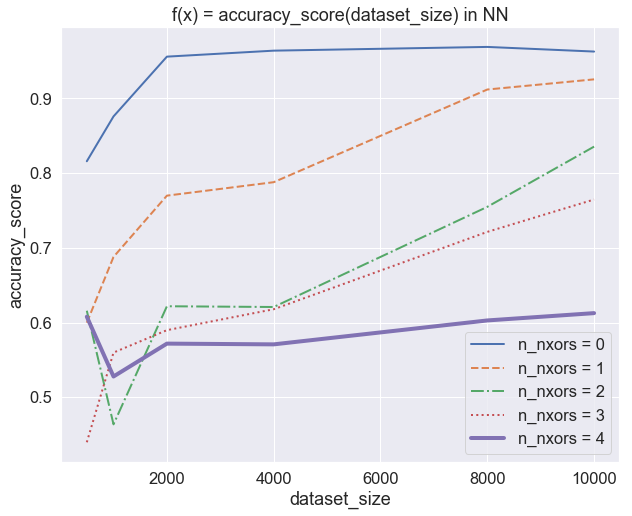

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
linestyles = ['-', '--', '-.', ':', '-']

plt.figure(figsize=(10, 8))
plt.plot(x, y1[0], linestyles[0], lw=2, label="n_nxors = 0")
plt.plot(x, y1[1], linestyles[1], lw=2, label="n_nxors = 1")
plt.plot(x, y1[2], linestyles[2], lw=2, label="n_nxors = 2")
plt.plot(x, y1[3], linestyles[3], lw=2, label="n_nxors = 3")
plt.plot(x, y1[4], linestyles[4], lw=4, label="n_nxors = 4")
plt.xlabel('dataset_size')
plt.ylabel('accuracy_score')
plt.title('f(x) = accuracy_score(dataset_size) in NN')
plt.legend(loc='lower right')
plt.show()

In [147]:
import random
import numpy as np
from sklearn.model_selection import train_test_split
import operator as op
import seaborn as sns
from tqdm import tqdm_notebook as load

In [148]:
class Cell:
    def __init__(self):
        self.Ra = random.gauss(1,0.01)
        self.Rb = random.gauss(1,0.01)
        self.Rc = random.gauss(1,0.01)
        self.Rd = random.gauss(1,0.01)
    def cellTimeCounter(self, byte):
        if byte == 1:
            return self.Ra,self.Rd
        if byte == 0:
            return self.Rb,self.Rc

In [149]:
cells_num = 64
chain = [Cell() for i in range(cells_num)]
chain2 = [Cell() for i in range(cells_num)]
chain3 = [Cell() for i in range(cells_num)]
chain4 = [Cell() for i in range(cells_num)]

In [150]:
def evaluator(chain, byte_arr):
    time_top = 0
    time_bottom = 0
    for i in range(cells_num):
        time_top += chain[i].cellTimeCounter(byte_arr[i])[0]
        time_bottom += chain[i].cellTimeCounter(byte_arr[i])[1]
    delta = time_top - time_bottom
    if abs(delta) < 0.01:
        delta += random.gauss(0, 0.02)
    if delta > 0:
        return 1, delta
    else:
        return 0, delta

In [151]:
C = [random.randint(0,1) for x in range(cells_num)]

C:\Users\inedostoev\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\inedostoev\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


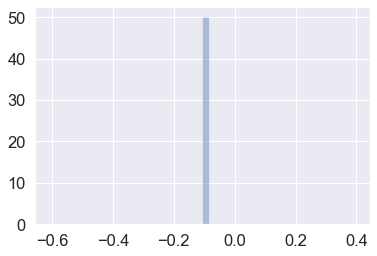

In [152]:
dataI = []
data = []
for i in range(10000):
    dataI.append(evaluator(chain,C)[0])
    data.append(evaluator(chain,C)[1])
sns_plot = sns.distplot(data)
fig = sns_plot.get_figure()

In [153]:
np.std(dataI)

0.0

In [154]:
data = []
labels = []
size = 100000
for i in load(range(size)):
    C = [random.randint(0,1) for x in range(cells_num)]
    data.append(C)
    out1 = op.xor(evaluator(chain,C)[0], evaluator(chain2,C)[0])
    out2 = op.xor(evaluator(chain3,C)[0], evaluator(chain4,C)[0])
    labels.append(op.xor(out1,out2))
    #labels.append(evaluator(chain, C)[0])
X = np.asarray(data).reshape(size,cells_num)
y = np.asarray(labels)

In [155]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\inedostoev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.50028


In [157]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [158]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [159]:
def create_baseline():
    model = Sequential()
    model.add(Dense(128, input_dim=cells_num, activation='relu'))
    model.add(Dense(64, input_dim=100, activation='relu'))
    model.add(Dense(16, input_dim=64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [160]:
epoches = []
train_accs = []
test_accs = []
losses = []
model = create_baseline()

for epoch in load(range(20)):
    epoches.append(epoch)
    history = model.fit(X_train, y_train, epochs = 1, validation_split = 0, verbose = 0)
    train_accs.append(history.history['accuracy'])
    losses.append(history.history['loss'])
    ev = model.evaluate(X_test,y_test, verbose = 1)
    test_accs.append(ev[1])
    print("Acc =", ev[1])
    if(ev[1] <= 0.95*max(test_accs)):
        break      

25000/25000 [==============================] - ETA: 12 - ETA: 1 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 50us/step
Acc = 0.5293599963188171
25000/25000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 40us/step
Acc = 0.6023600101470947
25000/25000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 50us/step
Acc = 0.7669199705123901
25000/25000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  -

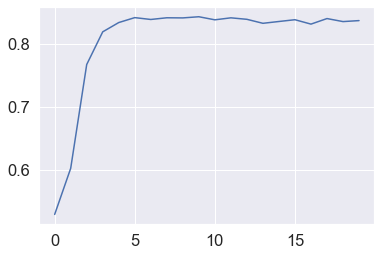

In [161]:
plt.plot(epoches, test_accs)

In [ ]:
# Check linear model

In [ ]:
cells_num = 256
ch = []
for i in range(0, 10):
    ch.append([Cell() for j in range(cells_num)])

In [ ]:
def get_logreg_acc(n):
    data = []
    labels = []
    size = 10000
    for i in range(size):
        C = [random.randint(0,1) for x in range(cells_num)]
        for byte in C:
            data.append(byte)
        
        out = evaluator(ch[0], C)
        if n > 0 and n < 10:
            for j in range(1, n):
                out = op.xor(out, evaluator(ch[j], C))
        elif n != 0:
            print("Error\n")

        labels.append(out)
    X = np.asarray(data).reshape(size,cells_num)
    y = np.asarray(labels)
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    logreg = LogisticRegression(solver='lbfgs')
    logreg.fit(X_train,y_train)
    y_pred=logreg.predict(X_test)
    #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    return metrics.accuracy_score(y_test, y_pred)

In [ ]:
cells_num = 128
x1 = []
y1 = []

from tqdm import tqdm_notebook as load

for i in load(range(0, 10)):
    x1.append(i)
    y1.append(get_logreg_acc(i))
    
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
plt.plot(x1, y1, lw=2)
plt.xlim([-0.5, 10])
plt.ylim([0.45, 1.01])
plt.xlabel('n XORs')
plt.ylabel('accuracy_score')
plt.title('var n XORs')
plt.show()    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import math


sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
plt.xlim([1.9, 10])
plt.ylim([0.4, 1.01])

x1 = []
y1 = []

for i in load(range(0, 5)):
    for j in range(2, 9):
        cells_num = 2**j
        x1.append(j)
        y1.append(get_logreg_acc(i))
    plt.plot(x1, y1, lw=2, label=i)
    x1 = []
    y1 = []
    
plt.xlabel('power of two')
plt.ylabel('acc')
plt.title('var cells_num')
plt.show()  

In [ ]:
def modified_evaluator(chain, byte_arr):
    time_top = 0
    time_bottom = 0
    for i in range(cells_num):
        time_top += chain[i].cellTimeCounter(byte_arr[i])[0]
        time_bottom += chain[i].cellTimeCounter(byte_arr[i])[1]
    delta = time_top - time_bottom
    return delta

In [ ]:
cells_num = 256
C = [random.randint(0,1) for x in range(cells_num)]
chain = [Cell() for i in range(cells_num)]

x2 = []
y2 = []

for i in load(range(1, 256)):
    cells_num = i
    x2.append(i)
    y2.append(modified_evaluator(chain, C))
    
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
plt.plot(x2, y2, lw=2)
plt.xlabel('cells_num')
plt.ylabel('delta')
plt.title('var cells_num')
plt.show()  

In [ ]:
## нейрон очка

In [ ]:
cells_num = 256
ch = []
for i in range(0, 10):
    ch.append([Cell() for j in range(cells_num)])

In [ ]:
def create_baseline():
    model = Sequential()
    model.add(Dense(100, input_dim=cells_num, activation='relu'))
    model.add(Dense(60, input_dim=100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
def get_dp_acc(n, m_size):
    data = []
    labels = []
    size = m_size
    for i in range(size):
        C = [random.randint(0,1) for x in range(cells_num)]
        for byte in C:
            data.append(byte)
        
        out = evaluator(ch[0], C)
        if n > 0 and n < 10:
            for j in range(1, n):
                out = op.xor(out, evaluator(ch[j], C))
        elif n != 0:
            print("Error\n")

        labels.append(out)
    X = np.asarray(data).reshape(size,cells_num)
    y = np.asarray(labels)
    
    epoches = []
    train_accs = []
    test_accs = []
    losses = []
    model = create_baseline()

    for epoch in load(range(10)):
        epoches.append(epoch)
        history = model.fit(X_train, y_train, epochs = 1, validation_split = 0, verbose = 0)
        train_accs.append(history.history['accuracy'])
        losses.append(history.history['loss'])
        ev = model.evaluate(X_test,y_test, verbose = 0)
    
        test_accs.append(ev[1])
        if(ev[1] <= 0.95*max(test_accs)):
            return epoches, test_accs
        
    return epoches, test_accs

In [ ]:
cells_num = 128

x3 = []

for i in load(range(0, 8)):
    x3.append(get_dp_acc(i, 10000))
    

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

l = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

plt.figure(figsize=(10, 8))
for i in range(0,8):
    plt.plot(x3[i][0], x3[i][1], label=l[i])
plt.xlabel('epoches')
plt.ylabel('accuracy_score')
plt.title('var n XORs')
plt.legend(loc='lower right')
plt.show()

In [ ]:
cells_num = 128

x3 = []
for i in load(range(1, 11)):
    x3.append(get_dp_acc(4, 10000*i))
    

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

x4=[]
y4=[]

plt.figure(figsize=(10, 8))
for i in range(1,11):
    x4.append(10000*i)
    y4.append(x3[i-1][1][-1])
plt.plot(x4, y4, lw=2)
plt.xlabel('epoches')
plt.ylabel('accuracy_score')
plt.title('var data set')
#plt.legend(loc='lower right')
plt.show()

## Setting up brand new PUFs 🤙🏿

In [24]:
from os import listdir
from os.path import isfile, join
import numpy as np
from tqdm import tqdm_notebook as load

path = "aist_puf_dataset_ver1_0/"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
PUFs = []
for n in onlyfiles:
    f = open(path + n, "r")
    a = np.fromfile(f, dtype=np.uint8)
    tmpBit = np.zeros((8, 2 * 1024 * 1024))
    for i in range(8):
        tmpBit[i] = a[(8 - i - 1) * (2 * 1024 * 1024): (8 - i) * 2 * 1024 * 1024]
    tmp2 = tmpBit.reshape(16, 1024, 1024)
    PUFres = np.transpose(tmp2, (2, 0, 1))
    _avgPUF = PUFres.sum(0) / 1024
    avgPUF = _avgPUF.sum(0) / 16
    PUFs.append((avgPUF, i))

## Here we got our PUFs mazafacka

In [25]:
import random
def arr_to_num(arr):
    i = 0
    for bit in arr:
        i = (i << 1) | bit
    return i

class TurboPUF:
    def __init__(self, params):
        self.arr = [[], []]
        
        for p in params[0]:
            random.seed()
            self.arr[0].append(random.gauss(p, 2)) #define derivation within defferent PUFs
            random.seed()
            self.arr[1].append(random.gauss(p, 2))
            
        self.num = params[1]
        self.mean = params[0].sum() / 1024
        
    # Input - sequence of 1024 bits
    def calc(self, inp):
        random.seed(arr_to_num(inp))
        mean = self.mean
        # delay = random.gauss(np.dot(self.arr, inp) / 1024, 0)
        # delay = np.dot(self.arr, inp) / 1024 
        delay = 0
        for bit, i in zip(inp, range(1024)):
            delay += self.arr[bit][i]
        
        delay = delay / 1024
        
        random.seed()
        
        delay += random.gauss(0, 0.001) #define derivation within 1 PUF
        # print("mean ", mean, " our ", delay)
        if delay > mean:
            res = 1
        else:
            res = 0
        return res, delay

In [26]:
turbopufs = []
for i in range(len(PUFs)):
    # print(PUFs[i])
    turbopufs.append(TurboPUF(PUFs[i]))

## 45 Fully armored PUFs are ready to destroy

### For one

In [27]:
ITER = 1000
means=[]
stds=[]
random.seed()
test = [random.randint(0,1) for x in range(1024)]
  
dataI = []
data = []
for p in load(turbopufs):
    for i in range(ITER):
        dataI.append(p.calc(test)[0])
        data.append(p.calc(test)[1])
#print("----------------------")
#for p in turbopufs:
#    print(p.calc(test))
#means.append(np.mean(data)) 
#stds.append(np.std(data))

In [28]:
data = np.asarray(data).reshape(45, ITER)
dataI = np.asarray(dataI).reshape(45, ITER)

In [29]:
import seaborn as sns

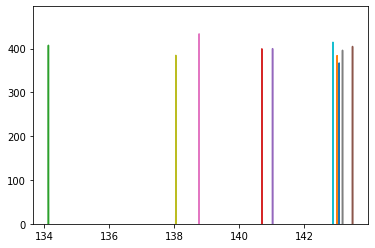

In [30]:
for i in range(10):
    sns_plot = sns.distplot(data[i])
    fig = sns_plot.get_figure()

C:\Users\inedostoev\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\inedostoev\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


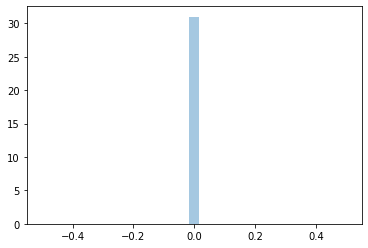

In [31]:
sns_plot = sns.distplot(dataI[0])
fig = sns_plot.get_figure()

### For many

In [32]:
dataI = []
data = []
for n in load(range(ITER)):  
    for p in turbopufs:
        dataI.append(p.calc(test)[0])
        data.append(p.calc(test)[1])

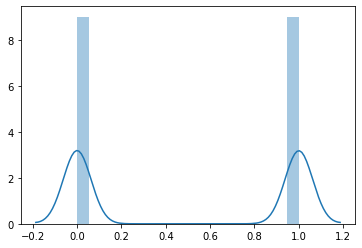

In [33]:
sns_plot = sns.distplot(dataI)
fig = sns_plot.get_figure()

In [34]:
dataset = set(data)
len(dataset), len(data)

(45000, 45000)

#### All elements are unique

In [35]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [165]:
data = []
labels = []
size = 10000
for i in load(range(size)):
    C = [random.randint(0,1) for x in range(1024)]
    for byte in C:
        data.append(byte)
    labels.append(turbopufs[0].calc(C)[0])
X = np.asarray(data).reshape(size,1024)
y = np.asarray(labels)

In [166]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [167]:
#Generate выбор очка

In [191]:
data = []
size = 10000

for i in load(range(size)):
    C = [random.randint(0,1) for x in range(1024)]
    data.append(C)

In [192]:
def get_sample(n_xors):
    labels = []
    for i in range(size): 
        out = turbopufs[0].calc(data[i])[0]
        for j in range(0, n_xors):
            out = op.xor(out, turbopufs[j+1].calc(data[i])[0])
                
        labels.append(out)
    
    X_ = np.asarray(data).reshape(size, 1024)
    y_ = np.asarray(labels)   
    return X_, y_

In [193]:
def get_logreg_acc(n_xors):

    X, y = get_sample(n_xors) 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    
    logreg = LogisticRegression(solver='lbfgs', max_iter=5000)
    logreg.fit(X_train,y_train)
    y_pred=logreg.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    return metrics.accuracy_score(y_test, y_pred)

In [ ]:
zhopa = 

Accuracy: 0.9388
Accuracy: 0.7124
Accuracy: 0.6084
Accuracy: 0.5056
Accuracy: 0.502
Accuracy: 0.5144
Accuracy: 0.4776
Accuracy: 0.4868
Accuracy: 0.4876
Accuracy: 0.4724


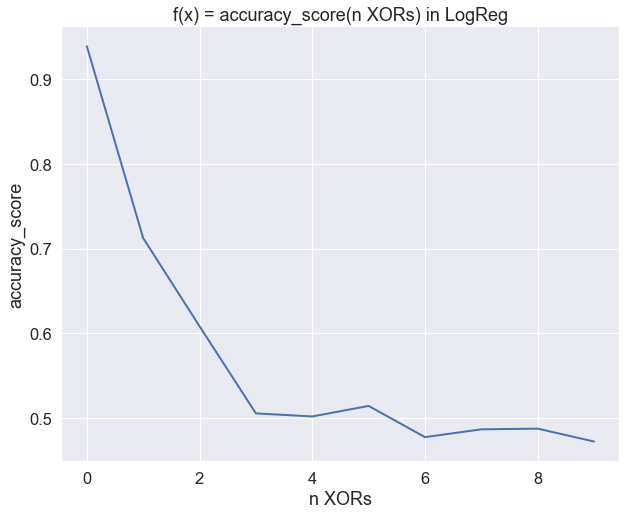

In [194]:
import matplotlib.pyplot as plt

n_x = 10

x1 = []
y1 = []

for i in load(range(0, n_x)):
    x1.append(i)
    y1.append(get_logreg_acc(i))
    
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
plt.plot(x1, y1, lw=2)
plt.xlabel('n XORs')
plt.ylabel('accuracy_score')
plt.title('f(x) = accuracy_score(n XORs) in LogReg')
plt.show()

In [196]:
#Нейрон очка

In [203]:
def create_baseline():
    model = Sequential()
    model.add(Dense(2048, input_dim=1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1024, input_dim=2048, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2048, input_dim=1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(60, input_dim=2048, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [204]:
data = []
size = 10000

for i in load(range(size)):
    C = [random.randint(0,1) for x in range(1024)]
    data.append(C)

In [205]:
def get_sample(n_xors):
    labels = []
    for i in range(size): 
        out = turbopufs[0].calc(data[i])[0]
        for j in range(0, n_xors):
            out = op.xor(out, turbopufs[j+1].calc(data[i])[0])
                
        labels.append(out)
    
    X_ = np.asarray(data).reshape(size, 1024)
    y_ = np.asarray(labels)   
    return X_, y_

In [206]:
def get_NN_acc(n_xors):

    X, y = get_sample(n_xors) 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
    
    model = create_baseline()
    model.fit(X_train, y_train, epochs = 5, validation_split = 0, verbose = 0, batch_size=128)
    ev = model.evaluate(X_test,y_test, verbose = 1, batch_size=128)
    
    print("Accuracy:", ev[1])
    return ev[1]

2500/2500 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 356us/step
Accuracy: 0.8848000168800354
2500/2500 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 422us/step
Accuracy: 0.6128000020980835
2500/2500 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 396us/step
Accuracy: 0.5708000063896179
2500/2500 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 379us/step
Accuracy: 0.5307999849319458
2500/2500 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 378us/step
Accuracy: 0.5199999809265137
2500/2500 [=====================

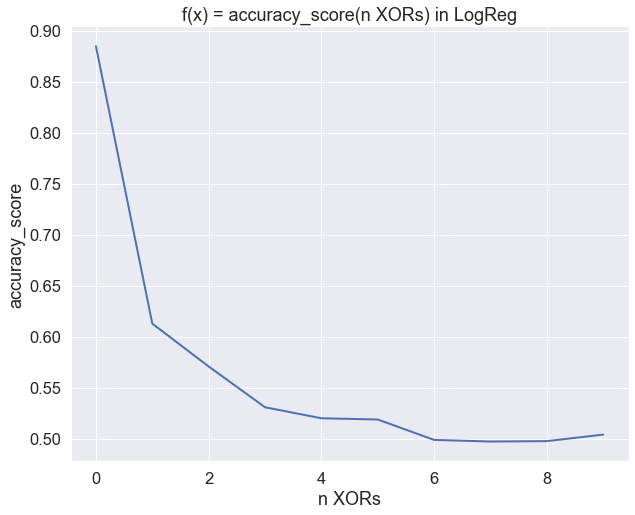

In [208]:
import matplotlib.pyplot as plt

n_x = 10

x1 = []
y1 = []

for i in load(range(0, n_x)):
    x1.append(i)
    y1.append(get_NN_acc(i))
    
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
plt.plot(x1, y1, lw=2)
plt.xlabel('n XORs')
plt.ylabel('accuracy_score')
plt.title('f(x) = accuracy_score(n XORs) in NN')
plt.show()

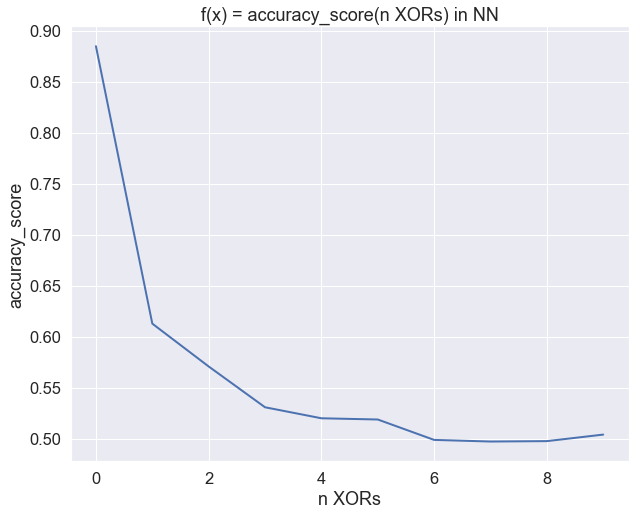

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
plt.plot(x1, y1, lw=2)
plt.xlabel('n XORs')
plt.ylabel('accuracy_score')
plt.title('f(x) = accuracy_score(n XORs) in NN')
plt.show()

In [195]:
#Обучение от Гоши Кита

In [ ]:
def create_baseline():
    model = Sequential()
    model.add(Dense(2048, input_dim=1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1024, input_dim=2048, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2048, input_dim=1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(60, input_dim=2048, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = create_baseline()
model.fit(X_train, y_train, epochs = 5, validation_split = 0, verbose = 0, batch_size=128)
model.evaluate(X_test,y_test, verbose = 1, batch_size=128)

In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\inedostoev\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.942
